# SIR Model for COVID-19 Transmission rates estimation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
from datetime import datetime 

In [2]:
# Here, we load the data directly from the website. 

current_data = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')
current_data_array = np.array(current_data)

In [3]:
current_data_array.shape


(9409, 6)

In [4]:
current_data_array[:,1]

array(['Afghanistan', 'Afghanistan', 'Afghanistan', ..., 'Zimbabwe',
       'Zimbabwe', 'Zimbabwe'], dtype=object)

In [5]:
current_data.head(5)

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [6]:
locations = np.array(current_data['location'])
#print(locations)
#print(dict.fromkeys(locations))
country_list = list(dict.fromkeys(locations))
print(country_list)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar

In [7]:
# To visualize the data from a country of our choice, we need to find the location of that data in the spreadsheet, and save the information to a new location! 


In [8]:
country_ind = country_list.index('United States') # Type in the name of your country here!


In [9]:
country_ind


195

In [10]:
country_list[country_ind]

'United States'

In [11]:
new_ind=current_data_array[:,1] == country_list[country_ind]

In [12]:
print(new_ind)

[False False False ... False False False]


In [13]:
new_cases = current_data_array[new_ind,2]
new_deaths = current_data_array[new_ind,3]
total_cases = current_data_array[new_ind,4]
total_deaths = current_data_array[new_ind,5]

In [14]:
dates = np.linspace(1, len(new_cases), len(new_cases)) # Because the US has updated daily, we can do this.


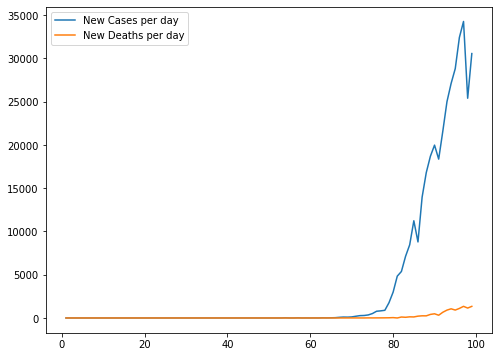

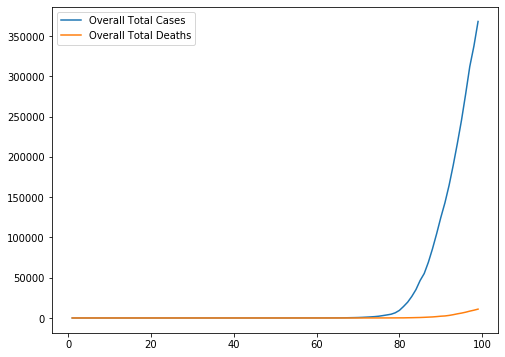

In [48]:
# Finally, we'll start by visualizing the data from our country of choice. 
plt.figure(figsize=(8, 6))
plt.plot(dates, new_cases, dates, new_deaths)
plt.legend(['New Cases per day', 'New Deaths per day'])

plt.figure(figsize=(8, 6))
plt.plot(dates, total_cases, dates, total_deaths)
plt.legend(['Overall Total Cases', 'Overall Total Deaths'])
plt.show()


In [16]:
import sklearn
from sklearn.linear_model import LinearRegression

In [17]:
dates = np.linspace(1, len(new_cases), len(new_cases)) 
dates = dates[:,np.newaxis] #dates from the US cases 

In [18]:
log_cases = np.log(np.array(new_cases, dtype=np.float64)) # Taking the natural log of the number of new cases in order to create a linear plot. 


/Users/sagarkurada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [19]:
infs = np.isinf(log_cases) # Setting places where the number of cases was 0 equal to 0 on the log scale - natural log of zero is negative infinity, which won't work with our plots.
log_cases[infs] = 0

In [20]:
model =  LinearRegression().fit(dates[60:],log_cases[60:]) # Performing a linear regression on the section of the data with new reported cases (Days 60+) 


In [21]:
pred = model.predict(dates) # Predicting the natural log of the number of cases based on the known dates.


In [49]:
dates_into_future = np.linspace(1, 120, 120) # Now, we want to look at future dates #Should change acc to the future outlook the days
fut_pred = model.predict(dates_into_future[60:, np.newaxis]) # Making predictions in future dates

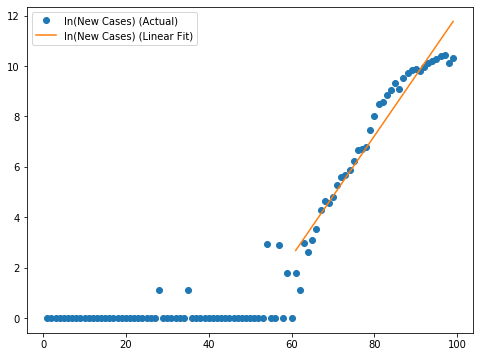

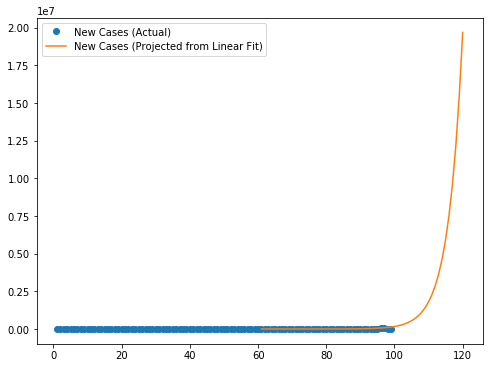

In [51]:
plt.figure(figsize=(8, 6)) # Here, we're plotting the natural log of the new cases and the linear model that we've fit to that data. 
plt.plot(dates,  log_cases, 'o', dates[60:], pred[60:])
plt.legend(['ln(New Cases) (Actual)', 'ln(New Cases) (Linear Fit)'])
plt.show()

plt.figure(figsize=(8, 6)) # Here, we're plotting the actual data and the projection of the next 10 days (Days 81-90) from the linear fit that we made before. 
plt.plot(dates,  new_cases, 'o', dates_into_future[60:], np.exp(fut_pred))
plt.legend(['New Cases (Actual)', 'New Cases (Projected from Linear Fit)'])
plt.show()

People get better! Exponential growth assumes that everyone who catches a disease has it forever, but as we already know, most people end up recovering from coronavirus and becoming either temporarily or permanently immune*. This means that, at some point, this number of people with the disease has to go down.
The rate at which the disease spreads can be changed. This is where things like Flattening The Curve and Social Distancing come in - if you're not arou

# SIR Model

Terminology:

population of people who can catch the disease (S)

population of people who are infected (I)

population of people who are recovered and have immunity (R)

Assumptions

Calculating dS/dt, dI/dt, dR/dt

In [52]:
import scipy
from scipy.integrate import odeint

Parameters

In [66]:
n_days = 500
contact_rate = 0.25
recovery_rate = 1/14
population = 327200000

In [67]:
time = np.linspace(0, n_days, n_days)


In [55]:

initial_infected, initial_recovered = 1, 0 # Initial conditions for infected and recovered people

initial_everyone_else = population - initial_infected - initial_recovered # Initial conditions for everyone else. 

initial_conditions = initial_everyone_else, initial_infected, initial_recovered 

In [56]:

def SIR(initial_conditions, t, population, contact_rate, recovery_rate):
  S, I, R = initial_conditions 
  dS = -contact_rate*S*I/population
  dI = contact_rate*S*I/population - recovery_rate*I 
  dR = recovery_rate*I 
  return dS, dI, dR


In [57]:
result = odeint(SIR, initial_conditions, time, args=(population, contact_rate, recovery_rate))
S, I, R = result.T

Text(0, 0.5, 'Number (1000s)')

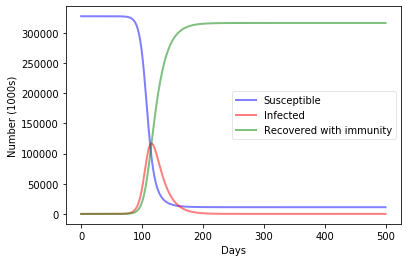

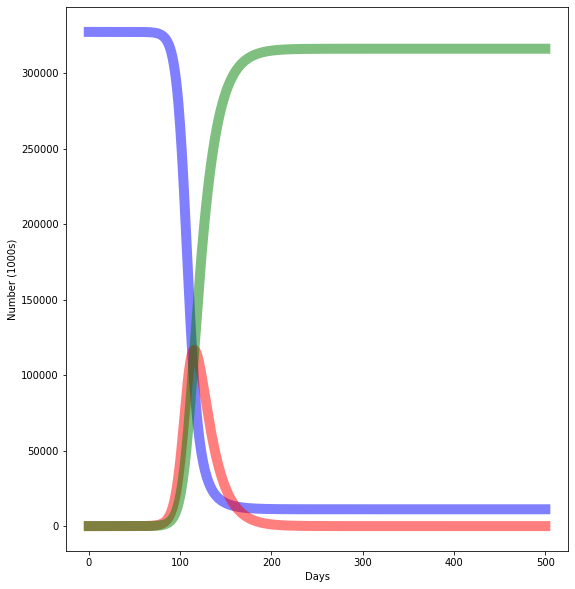

In [58]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(time, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(time, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

fig = plt.figure(facecolor='w', figsize=(9, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/1000, 'b', alpha=0.5, lw=10, label='Susceptible')
ax.plot(time, I/1000, 'r', alpha=0.5, lw=10, label='Infected')
ax.plot(time, R/1000, 'g', alpha=0.5, lw=10, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')

1. Here as we have taken the complete US population under consideration of getting to the disease. 
   But now as there is a self quarantine, very less people will get into the consideration set and the curve height gets decreased ( #flatten)
2. a is transmission rate; lower transmission rate with hand washing
3. S is Susceptible rate; lower susceptible with vaccines

# Implementing Social Distancing - Decrease in Contact Rate

In [68]:
population = 327200000 # 1/3rd Population of the United States
n_days = 500 # Days over which to integrate 
contact_rate = 0.15 # Contact Rate - (assumption) 
recovery_rate = 1/14 # Recovery Rate - (assumption)
time = np.linspace(0, n_days, n_days)

Text(0, 0.5, 'Number (1000s)')

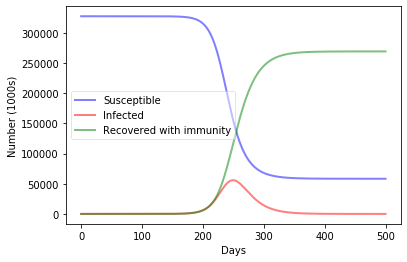

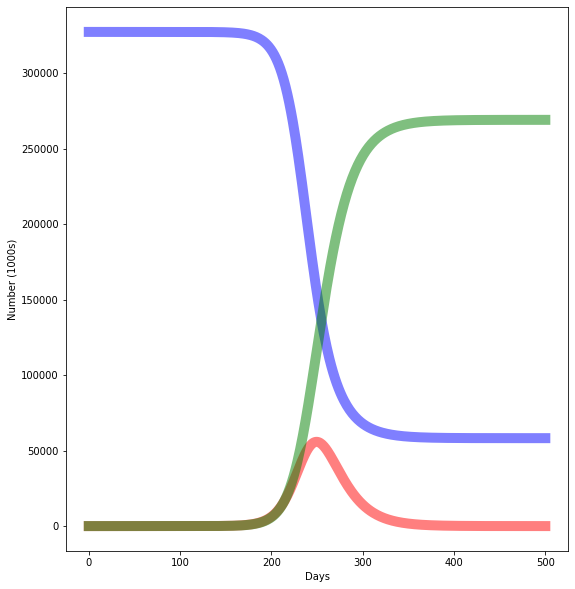

In [69]:
result = odeint(SIR, initial_conditions, time, args=(population, contact_rate, recovery_rate))
S, I, R = result.T
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(time, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(time, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

fig = plt.figure(facecolor='w', figsize=(9, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/1000, 'b', alpha=0.5, lw=10, label='Susceptible')
ax.plot(time, I/1000, 'r', alpha=0.5, lw=10, label='Infected')
ax.plot(time, R/1000, 'g', alpha=0.5, lw=10, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')


# Taking Hypothetical case scenario :
8 weeks time frame,

0.25 contact rate(transmision rate),

1/3 rd of population are under consideration zone

In [80]:
population = 100000000#  1/3 Population of the United States
n_days = 60 # Days over which to integrate 
contact_rate = 0.15 # Contact Rate - (assumption) 
recovery_rate = 1/14 # Recovery Rate - (assumption)
time = np.linspace(0, n_days, n_days)

In [81]:
result = odeint(SIR, initial_conditions, time, args=(population, contact_rate, recovery_rate))
S, I, R = result.T


Text(0, 0.5, 'Number (1000s)')

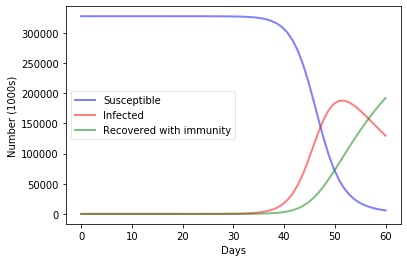

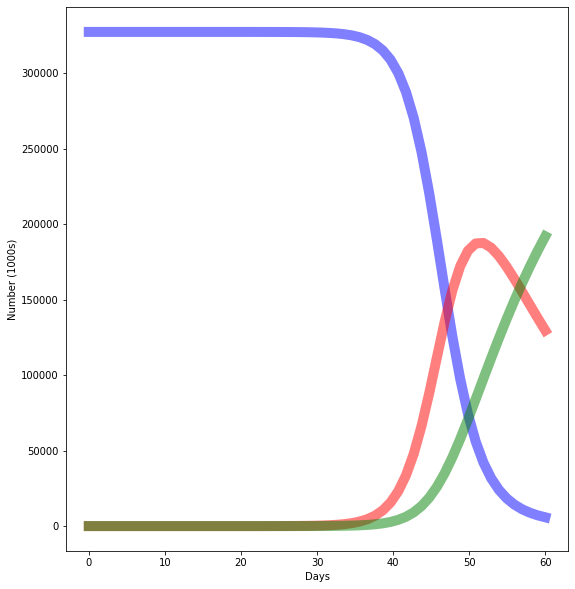

In [82]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(time, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(time, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

fig = plt.figure(facecolor='w', figsize=(9, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/1000, 'b', alpha=0.5, lw=10, label='Susceptible')
ax.plot(time, I/1000, 'r', alpha=0.5, lw=10, label='Infected')
ax.plot(time, R/1000, 'g', alpha=0.5, lw=10, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')

Source : https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/ , 
         https://www.youtube.com/watch?v=Qrp40ck3WpI
         

In [89]:
population = 300000000 # 1/5 Population of India

n_days = 150# Days over which to integrate 
contact_rate = 0.25 # Contact Rate - (assumption) 
recovery_rate = 1/14 # Recovery Rate - (assumption)
time = np.linspace(0, n_days, n_days)

In [90]:
result = odeint(SIR, initial_conditions, time, args=(population, contact_rate, recovery_rate))
S, I, R = result.T
#print(S,I,R)

Text(0, 0.5, 'Number (lakhs)')

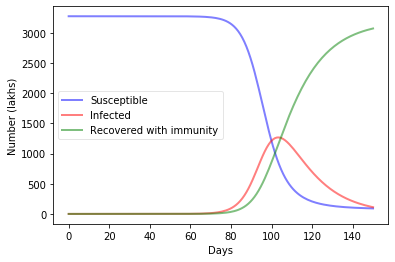

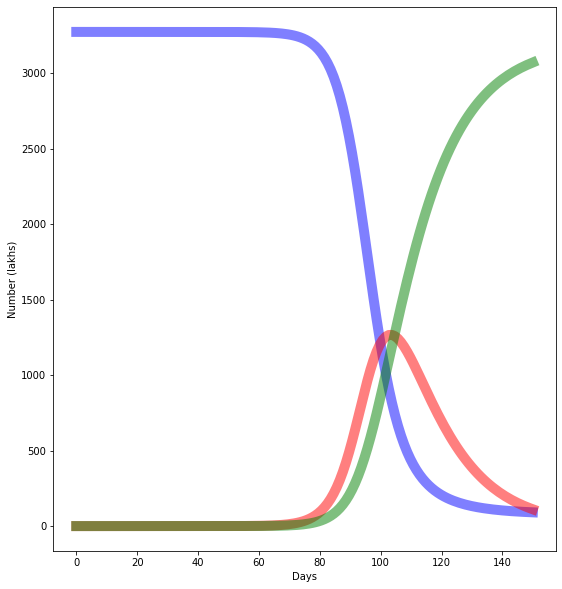

In [91]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/100000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(time, I/100000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(time, R/100000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (lakhs)')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

fig = plt.figure(facecolor='w', figsize=(9, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/100000, 'b', alpha=0.5, lw=10, label='Susceptible')
ax.plot(time, I/100000, 'r', alpha=0.5, lw=10, label='Infected')
ax.plot(time, R/100000, 'g', alpha=0.5, lw=10, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('Number (lakhs)')